In [20]:
from langgraph.graph import StateGraph
from typing import List, TypedDict

In [21]:
class AgentState(TypedDict):
    name:str
    values: List[int]
    operation:str
    result:str

In [22]:
def operation_node(state:AgentState) -> AgentState:
    val = 0
    if state['operation']=="+":
        val=sum(state['values'])
    if state['operation']=="*":
        product = 1
        for i in range(len(state['values'])):
            product *=state['values'][i]
        val=product
    state['result'] = f"Hello {state['name']}, your answer is: {val}"
    return state

In [23]:
graph = StateGraph(AgentState)
graph.add_node("operator",operation_node)
graph.set_entry_point("operator")
graph.set_finish_point("operator")
app = graph.compile()


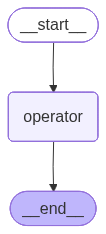

In [24]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
ans = app.invoke({"name": "Jack Sparrow", "values": [1,2,3,4], "operation":"*"})
ans['result']

'Hello Jack Sparrow, your answer is: 24'